# Homework 6
Jan Piotrowski

## Dataset
We will use SpeedDating imbalanced dataset with the following features:
- **pref_o_attractive**: How important does the partner rate attractiveness
- **pref_o_sincere**: How important does the partner rate sincerity
- **pref_o_intelligence**: How important does the partner rate intelligence
- **pref_o_funny**: How important does the partner rate being funny
- **pref_o_ambitious**: How important does the partner rate ambition
- **pref_o_shared_interests**: How important does the partner rate having shared interests
- **attractive_o**: Rating by the partner (about me) at the night of the event on attractiveness
- **intelligence_o**: Rating by the partner (about me) at the night of the event on intelligence
- **funny_o**: Rating by the partner (about me) at the night of the event on being funny
- **shared_interests_o**: Rating by the partner (about me) at the night of the event on shared interest
- **attractive_important**: What do you look for in a partner - attractiveness
- **sincere_important**: What do you look for in a partner - sincerity
- **intellicence_important**: What do you look for in a partner - intelligence
- **funny_important**: What do you look for in a partner - being funny
- **ambtition_important**: What do you look for in a partner - ambition
- **shared_interests_important**: What do you look for in a partner - shared interests
- **interests_correlate**: Correlation between participant’s and partner’s ratings of interests.
- **like**: Did you like your partner?
- **TARGET**: Match or not.

## Task 1
We selected `sklearn.ensemble.RandomForestClassifier` to analysis. The trained model on split training-test size 3:1 obtain following results on test set:
| Model                   | Recall    | Precision | F1       | Accuracy | AUC      |
|-------------------------|-----------|-----------|----------|----------|----------|
| RandomForestClassifier  | 0.261538  | 0.586207  | 0.361702 | 0.82659  | 0.783438 |

The results for permutation-based variable importance obtained with `dalex` package are following:

![variable importance](vi.png)


It is evident that the `like` feature holds significant importance, as indicated by a remarkable 50% increase in drop-out loss. Among the top five most crucial features, we find: `attractive_o`, `shared_interests_o`, `funny_o`, and `interests_correlate`. This leads us to the conclusion that individuals tend to evaluate their willingness to meet others again based on these specific features. However, adopting a Rashomon perspective, it becomes necessary to explore other models from this class with comparable performance on this dataset.

## Task 2
In table below we can see similar models with different hyperparameters. The first model was trained with default parameters that are following: `n_estimators=100, max_depth=None`.
| Model                  | Recall           | Precision        | F1               | Accuracy         | AUC              |
|------------------------|------------------|------------------|------------------|------------------|------------------|
| RF (Default)           | 0.261538         | 0.586207         | 0.361702         | 0.82659          | 0.783438         |
| RF max_depth=3         | 0.076923         | 0.555556         | 0.135135         | 0.815029         | 0.757624         |
| RF n_estimators=20     | 0.246154         | 0.551724         | 0.340426         | 0.820809         | 0.776184         |
| RF n_estimators=200    | 0.2              | 0.541667         | 0.292135         | 0.817919         | 0.787873         |

Below we can see theirs permutation-based variable importance:

![variable importance2](vi_max_depth_3.png)
![variable importance2](vi_n_20.png)
![variable importance2](vi_n_200.png)


The significance of both like and attractive_o remains consistent, showing no change. However, the positions and scores of other variables in the ranking vary across different plots. This discrepancy suggests that like and attractive_o are genuinely important, at least for the RandomForestClassifier class. The variability in the rankings of other features indicates a dependency on how the random forest constructs its model.

# Task 3

Gini impurity feature importances can be seen on plot below.

![mdi](mdi.png)

The features `like` and `attractive_o` continue to hold the utmost importance. Notably, `shared_interest_o` now shares the same importance level as `attractive_o`, a departure from its consistently lower ranking in all permutation-based variable importance results. Could this discrepancy be attributed to a deficiency in gini impurity? A comparative analysis with SHAP results may provide valuable insights.

The results for SHAP variable importance can be seen on plot below.

![shap](shap.png)

While `like` maintains its lead, it's noteworthy that `shared_interests_o` exhibits a gini impurity as high as `attractive_o`. This creates a discrepancy with permutation-based variable importance methods. Which approach is correct? It's uncertain; perhaps they all offer valid insights. However, this divergence in perspectives is reminiscent of the Rashomon movie, where different viewpoints reveal distinct truths.

# Appendix

In [33]:
import dalex as dx
import shap

import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


In [5]:
url = 'https://raw.githubusercontent.com/adrianstando/imbalanced-benchmarking-set/main/datasets/SpeedDating.csv'
response = requests.get(url)
if response.status_code == 200:
    with open('SpeedDating.csv', 'wb') as f:
        f.write(response.content)
else:
    print(f"Failed to download the file. Status code: {response.status_code}")
    
path = "SpeedDating.csv"
# first column is the index
df = pd.read_csv(path, index_col=0)
df

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like,TARGET
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,0.14,7.0,0
1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,10.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,0.54,7.0,0
3,30.0,5.0,15.0,40.0,5.0,5.0,7.0,9.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,0.61,7.0,1
4,30.0,10.0,20.0,10.0,10.0,20.0,8.0,9.0,6.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.21,6.0,1
5,50.0,0.0,30.0,10.0,0.0,10.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.25,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,15.0,15.0,20.0,25.0,10.0,15.0,2.0,6.0,2.0,1.0,25.0,10.0,20.0,20.0,10.0,15.0,0.35,5.0,0
1837,15.0,15.0,25.0,25.0,15.0,5.0,4.0,8.0,3.0,2.0,25.0,10.0,20.0,20.0,10.0,15.0,0.45,5.0,0
1838,20.0,20.0,20.0,20.0,10.0,10.0,5.0,4.0,5.0,3.0,25.0,10.0,20.0,20.0,10.0,15.0,0.13,5.0,0
1840,15.0,15.0,25.0,25.0,20.0,0.0,4.0,7.0,3.0,0.0,25.0,10.0,20.0,20.0,10.0,15.0,0.54,5.0,0


In [13]:
# Split the data into features and target variable
X = df.drop('TARGET', axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of the RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
explainer = dx.Explainer(rf, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 346 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 346 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe689960b80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.179, max = 0.94
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.75, mean = 0.0087, max = 0.98
  -> model_info        : package sklearn

A new explainer has been created!


/home/janek/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.261538,0.586207,0.361702,0.82659,0.783438


In [17]:
pvi = explainer.model_parts()
pvi.result

,variable,dropout_loss,label
0,intellicence_important,0.210079,RandomForestClassifier
1,pref_o_sincere,0.210495,RandomForestClassifier
2,sincere_important,0.212505,RandomForestClassifier
3,pref_o_ambitious,0.212623,RandomForestClassifier
4,ambtition_important,0.215456,RandomForestClassifier
5,_full_model_,0.216562,RandomForestClassifier
6,funny_important,0.222179,RandomForestClassifier
7,pref_o_intelligence,0.223490,RandomForestClassifier
8,pref_o_attractive,0.223731,RandomForestClassifier
9,pref_o_funny,0.224265,RandomForestClassifier


In [18]:
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

In [39]:
rf1 = RandomForestClassifier(max_depth=3, random_state=42)
rf2 = RandomForestClassifier(n_estimators=20, random_state=42)
rf3 = RandomForestClassifier(n_estimators=200, random_state=42)

rf1.fit(X_train, y_train), rf2.fit(X_train, y_train), rf3.fit(X_train, y_train)

(RandomForestClassifier(max_depth=3, random_state=42),
 RandomForestClassifier(n_estimators=20, random_state=42),
 RandomForestClassifier(n_estimators=200, random_state=42))

In [40]:
explainer1 = dx.Explainer(rf1, X_test, y_test)
explainer2 = dx.Explainer(rf2, X_test, y_test)
explainer3 = dx.Explainer(rf3, X_test, y_test)


Preparation of a new explainer is initiated

  -> data              : 346 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 346 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe689960b80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0422, mean = 0.174, max = 0.664
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.546, mean = 0.0134, max = 0.954
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 346 rows 18 cols
  -> target variable   : Par

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [54]:
explainer1.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.076923,0.555556,0.135135,0.815029,0.757624


In [55]:
explainer2.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.246154,0.551724,0.340426,0.820809,0.776184


In [56]:
explainer3.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.2,0.541667,0.292135,0.817919,0.787873


In [42]:
explainer1.model_parts().plot(show=False).update_layout(autosize=False, width=600, height=450, title="Random Forest max_depth=3")


In [43]:
explainer2.model_parts().plot(show=False).update_layout(autosize=False, width=600, height=450, title="Random Forest n_estimators=20")

In [44]:
explainer3.model_parts().plot(show=False).update_layout(autosize=False, width=600, height=450, title="Random Forest n_estimators=200")

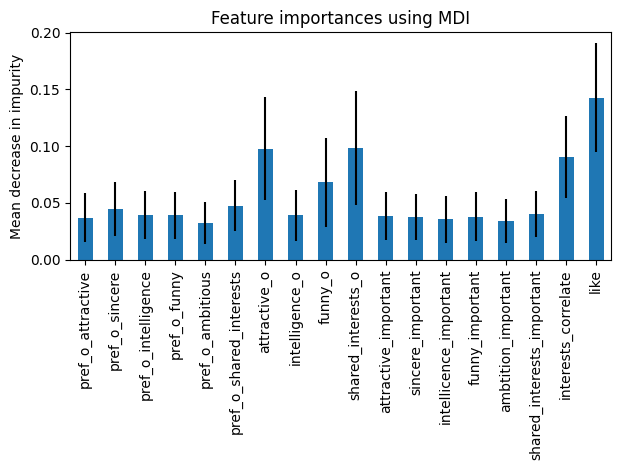

In [32]:
importances_gini = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances_gini, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

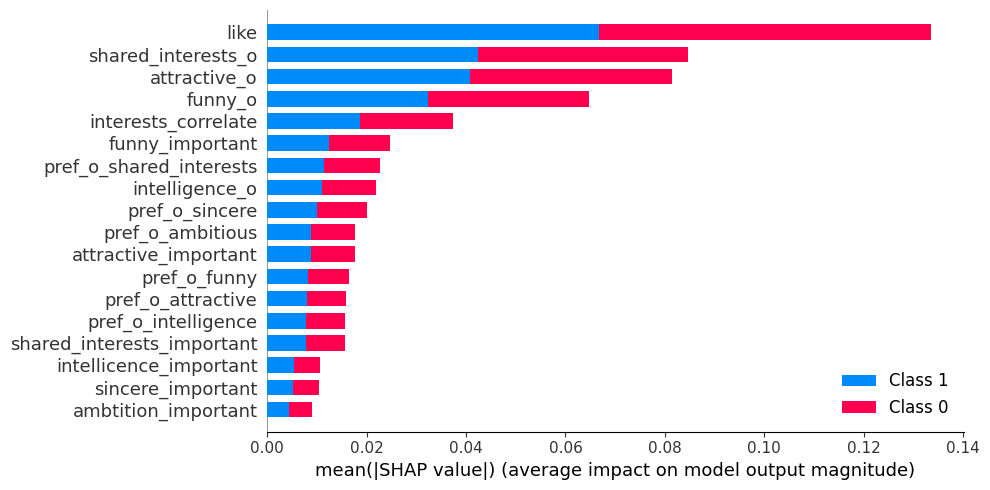

In [51]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(10, 5))